In [7]:
import pytesseract
import pandas as pd
import seaborn as sns
from PIL import Image

In [2]:
img = Image.open('temp/correio da lavoura_52_marco_1918/page0001-2.png')
data = pytesseract.image_to_data(img, lang='por', output_type=pytesseract.Output.DATAFRAME)
data.head()

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,1698,2393,-1.0,NaN
1,2,1,1,0,0,0,0,430,12,54,-1.0,NaN
2,3,1,1,1,0,0,0,430,12,54,-1.0,NaN
3,4,1,1,1,1,0,0,430,12,54,-1.0,NaN
4,5,1,1,1,1,1,0,430,12,54,95.0,


In [3]:
data['page_block_par_num'] = (data['page_num'].astype(str).str.rjust(3,'0') +
                                   data['block_num'].astype(str).str.rjust(3,'0') +
                                   data['par_num'].astype(str).str.rjust(3,'0')).astype(int)
data['page_block_par_num'].nunique()

323

In [5]:
only_words = data[data['level'] == 5]
only_words.groupby('page_block_par_num')['conf'].describe()

,count,mean,std,min,25%,50%,75%,max
page_block_par_num,,,,,,,,
1001001,1.0,95.000000,NaN,95.000000,95.000000,95.000000,95.000000,95.000000
1002001,1.0,95.000000,NaN,95.000000,95.000000,95.000000,95.000000,95.000000
1003001,7.0,53.478415,45.351288,0.000000,9.402771,71.957993,93.435894,96.713585
1004001,2.0,95.000000,0.000000,95.000000,95.000000,95.000000,95.000000,95.000000
1005001,1.0,73.941574,NaN,73.941574,73.941574,73.941574,73.941574,73.941574
...,...,...,...,...,...,...,...,...
1131001,15.0,46.843116,33.112144,0.000000,18.558991,46.568226,74.285957,92.621704
1132001,11.0,53.718011,28.431851,0.000000,39.824303,64.035080,70.146130,90.480713
1132002,2.0,73.553259,13.876703,63.740948,68.647104,73.553259,78.459415,83.365570


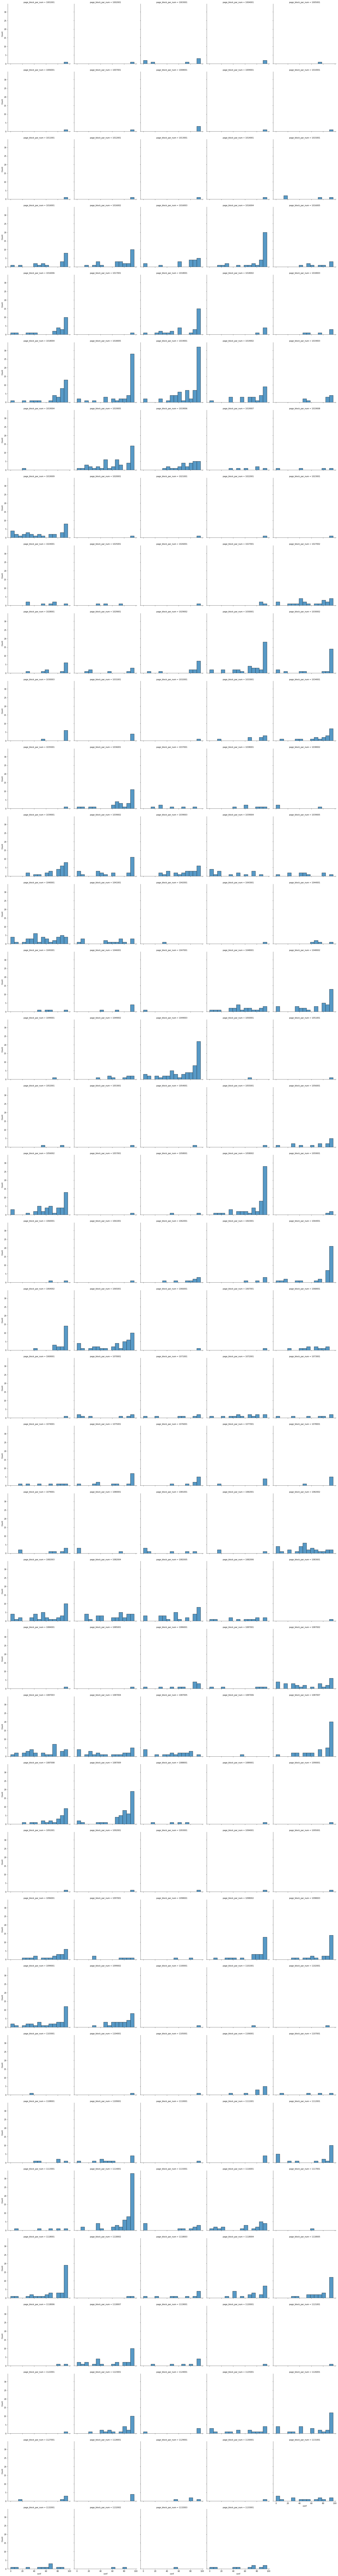

In [10]:
sns.displot(data=only_words, x='conf', col='page_block_par_num', col_wrap=5)

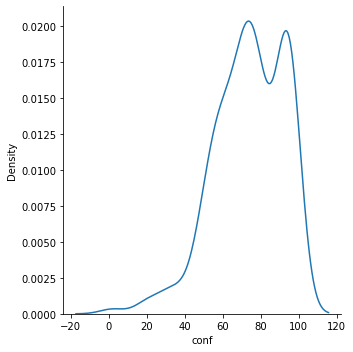

In [16]:
sns.displot(data=only_words.groupby('page_block_par_num')['conf'].mean(), kind='kde')

In [20]:
keep = only_words.groupby('page_block_par_num')['conf'].mean() > 40
keep = keep.reset_index()
keep = keep.loc[keep['conf'], 'page_block_par_num']
keep.nunique()

180

In [24]:
data['text'] = data['text'].astype(str)
data.loc[data['level'] < 4, 'text'] = '\n'
data.loc[data['level'] == 5, 'text'] = data.loc[data['level'] == 5, 'text'].fillna('') + ' '

page_block_par_num
1001001                                                 \n  
1002001                                               \n    
1003001            \nço ** Anna escola nocturna para socios 
1004001                                               \n    
1005001                                                \n+3 
                                 ...                        
1131001    \ntaveis, gastando neste met s6625 Tenda atend...
1132001    \nda Cunura o exme. sr. Cor | Presidente, reso...
1132002                                               \n4 = 
1132003                                                 \nÀ 
1133001    \nnumero de lIrabulhadores Para O serviço de e...
Name: text, Length: 180, dtype: object

In [25]:
lines = data[data['page_block_par_num'].isin(keep)].groupby('page_block_par_num')['text'].sum().str.strip() + '\n'
text = lines.sum().strip()
text

"ço ** Anna escola nocturna para socios\n\n+3\n\n\nCORREIO  LAVOURA\n\n\n\n\n\nAnchieta\nCENTRO INICIADOR 4, MELHORAMENTOS\nRealizou-se domingo ultimo 2 Assemblça Extraoidinaria. convo cada pela sus actual direciaria, O Centro Iniciador de Melhoramen- tos .\nFoi convidado para presidir a sessão o sr. Dr. Alherto Salema Oarção Ribeiro, influente politi- «o carioca « candidato à deputa- do ss vitimas elerções federoes.\nFizceam porte da mesa os Drs Fernandes Lima. Prisco Barbosa, Armando Souto Maior e O sr. Carivuldo P  Saigado.\nPeia Dr À Souto Maior, 1º se- eresario, foi lida à scta Cu sessão Wolemne de 25 de Novembro do anno p. findo, onde consta o me- musa cel discurso do se. Os. Fer\n-nandes Lima, digno presidente fazendo à histoncu de Anchieta.\nA pedido de consultor juridico Dr Psisco Barbosa, o sr. Cari- valido P. Salgado, 2º secretario, têu a acta da installação do Cen tros\n\n-* Sobre esta leitura falaram os ars. Drs. Priscc: Bartosa, Fernan- des Lima, e Henrique Autran, Antoni

In [26]:
from evaluate_quality import char_accuracy

with open('C:/Users/bruno/Documents/Projetos/TCC/ground-truth/3-dificil/correio da lavoura_52_marco_1918-2.txt', encoding='utf8') as f:
    gt = f.read()

char_accuracy(gt, text)

0.7496217178460169